# library

In [ ]:
!pip install nltk emoji unidecode Sastrawi wordcloud matplotlib wordsegment

import pandas as pd
import re
import emoji
import unicodedata
from unidecode import unidecode
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordsegment import load, segment

nltk.download('punkt')
nltk.download('punkt_tab')
load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
compound_dict = {
    "banyakiklan": "banyak iklan",
    "pakewifi": "pake wifi",
    "aplikasibagus": "aplikasi bagus",
    "bacacerita": "baca cerita",
    "tolongdong": "tolong dong",
    "sebenarnyalg" : "sebenarnya lagi"
}

slang_dict = {
    "wp" : "wattpad",
    'bangett' : 'banget',
    'bngt' : 'banget',
    'bgt' : 'banget',
    'baguss' : 'bagus',
    "bgus": "bagus",
    'bgs' : 'bagus',
    "makasih": "terima kasih",
    "makasi": "terima kasih",
    "thx": "terima kasih",
    "tq": "terima kasih",
    "g" : "tidak",
    "gk": "tidak",
    "ga": "tidak",
    "gak": "tidak",
    "ngga": "tidak",
    "nggak" : "tidak",
    'kaga' : 'tidak',
    'kagak' : 'tidak',
    'tdk' : 'tidak',
    "bener2": "benar benar",
    "bener" : "benar",
    'bnr' : "benar",
    "dr": "dari",
    "tp": "tapi",
    'tpi' : 'tapi',
    "jg": "juga",
    "y" : "iya",
    'ya' : 'iya',
    "iyaa" : "iya",
    "yaa" : "iya",
    "yah" : "iya",
    "yh" : "iya",
    "yg" : "yang",
    "yng" : "yang",
    "klo" : "kalau",
    'kalo' : 'kalau',
    'cuman' : 'cuma',
    'cmn' : 'cuma',
    'cm' : 'cuma',
    'biarin': 'biar',
    'kayak' : 'seperti',
    'kek' : 'sepeti',
    'ky' : 'seperti',
    'kaya' : 'seperti',
    'udh' : 'sudah',
    'udah' : 'sudah',
    'ud' : 'sudah',
    'skrg' : 'sekarang',
    'skrng' : 'sekarang',
    'tpi' : 'tapi',
    'tp' : 'tapi',
    'ttp' : 'tetap',
    'tetep': 'tetap',
    'cuman' : 'cuma',
    'cmn' : 'cuma',
    'cm' : 'cuma',
    'jaring': 'jaringan',
    'gw' : 'aku',
    'gua' : 'aku',
    'gue' : 'aku',
    'ak' : 'aku',
    'aq' : 'aku',
    'aqu' : 'aku',
    'q' : 'aku',
    'adl' : 'adalah',
    'pliss' : 'tolong',
    'plis' : 'tolong',
    'plik' : 'tolong',
    'pls' : 'tolong',
    'please' : 'tolong',
    'pl' : 'tolong',
    'tlg' : 'tolong',
    'tlng' : 'tolong',
    'gt' : 'gitu',
    'gits' : 'gitu',
    'karna' : 'karena',
    'trs' : 'terus',
    'trus' : 'terus',
    'apk' : 'aplikasi',
    'apl' : 'aplikasi',
    'aplik' : 'aplikasi',
    'aplikas' : 'aplikasi',
    'knp' : 'kenapa',
    'ilang' : 'hilang',
    'draf' : 'draft',
    'lu' : 'kamu',
    'eror' : 'error',
    'entah' : 'gabisa',
    'gbs' : 'gabisa',
    'x' : 'kali',
    'ni' : 'ini',
    'ny' : 'nya',
    'log' : 'login',
    'apknya' : 'aplikasi',
    'app' : 'aplikasi',
    'dri' : 'dari',
    'pdhl' : 'padahal',
    'wattpadnya' : 'wattpad',
    'sdh' : 'sudah',
    'abis' : 'habis',
    'pke' : 'pakai',
    'pake' : 'pakai',
    'make' : 'pakai',
    'gmn' : 'gimana',
    'bsa' : 'bisa',
    'knpa' : 'kenapa',
    'moga' : 'semoga',
    'jaring' : 'jaringan',
    'balikin' : 'kembalikan',
    'sampe' : 'sampai',
    'jls' : 'jelas',
    'sm' : 'sama',
    'lgi': 'lagi',
    'jdi' : 'jadi',
    'sy' : 'saya',
    'bs' : 'bisa',
    'aj' : 'aja',
    'ngk': 'tidak',
    'updatenya' : 'update',
    'kisah' : 'cerita',
    'jga' : 'juga',
    'ngak' : 'tidak',
    'hrs' : 'harus',
    'instal' : 'install',
    'kau' : 'kamu',
    'dongg' : 'dong',
    'bgtt' : 'banget',
    'duit' : 'uang',
    'bugnya' : 'bug',
    'ngebug' : 'bug',
    'ngelag' : 'lag',
    'lemot' : 'lag',
    'lola' :  'lag',
    'unduh' : 'simpan',
    'download' : 'simpan',

}

def fix_compound_words(text):
    for key, val in compound_dict.items():
        text = re.sub(r'\b' + re.escape(key) + r'\b', val, text)
    new_tokens = []
    for word in text.split():
        if len(word) > 10:
            segmented = segment(word)
            new_tokens.extend(segmented)
        else:
            new_tokens.append(word)
    return ' '.join(new_tokens)

def normalize_text(text):
    for key, val in slang_dict.items():
        text = re.sub(r'\b' + re.escape(key) + r'\b', val, text)
    return text

# preprocessing

In [ ]:
def preprocessed(text):
    text = unidecode(str(text))
    text = unicodedata.normalize('NFKC', text)
    text = emoji.replace_emoji(text, replace='')
    text = text.lower().strip()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = fix_compound_words(text)
    text = normalize_text(text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = word_tokenize(text)
    words = [word for word in words if len(word) > 1]
    return words

df_reviews = pd.read_csv('wattpad_reviews_original.csv')

if 'content_casefold' not in df_reviews.columns:
    df_reviews['content_casefold'] = df_reviews['content'].str.lower()
    print("✅ Case Folding ditambahkan di Preprocessing.")

df_reviews['content_tokenized'] = df_reviews['content_casefold'].apply(preprocessed)
print("✅ Preprocessing selesai.")

✅ Case Folding ditambahkan di preprocessing.
✅ Preprocessing selesai.



,

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

df_reviews['content_stemmed'] = df_reviews['content_tokenized'].apply(stem_words)

print("✅ Stemming selesai.")

✅ Stemming selesai.


# stopword

In [ ]:
stopwords_indonesia = set([
    'ada', 'agar', 'aja', 'aku', 'saya', 'akan', 'alah', 'adalah', 'anda', 'apa', 'apalagi', 'atau',
    'ayo', 'bagi', 'banget', 'bahwa', 'bagai', 'bagi', 'bagus', 'banyak', 'ber', 'biar',
    'boleh', 'buat', 'bukan', 'cuman', 'dalam', 'dan', 'dapat', 'dari', 'deh', 'dengan',
    'di', 'doang', 'dong', 'dua', 'dulu', 'eh', 'enggak', 'gak', 'ganggu', 'gin', 'gitu',
    'hah', 'harap', 'harus', 'hanya', 'iya', 'ingin', 'itu', 'ini', 'jadi', 'jah', 'jangan',
    'juga', 'kah', 'kak', 'kalau', 'kali', 'kan', 'karena', 'kasih', 'kayak', 'ke', 'kek',
    'kembali', 'kita', 'ku', 'kamu', 'kalian', 'kok', 'ko', 'lah', 'lagi', 'loh', 'mah',
    'makin', 'malah', 'masa', 'masih', 'mau', 'mana', 'mereka', 'mulu', 'nah', 'ni', 'nih',
    'nya', 'oke', 'oleh', 'padahal', 'pada', 'pa', 'parah', 'pas', 'per', 'perlu',
    'please', 'plis', 'pun', 'punya', 'saja', 'sama', 'sangat', 'satu', 'sebagai', 'se',
    'seperti', 'selalu', 'semua', 'sendiri', 'sih', 'sini', 'supaya', 'sudah', 'sumpah',
    'suruh', 'tadi', 'tapi', 'telah', 'tentang', 'terhadap', 'terlalu', 'tetap', 'tidak',
    'tiba', 'tuh', 'tolong', 'tu', 'untuk', 'udah', 'ulang', 'walaupun', 'yang', 'bahkan',
    'ken', 'cuma', 'coba', 'lain', 'cara', 'guna', 'agak', 'ganti', 'si', 'bahkan', 'ep',
    'sekali', 'segini', 'pernah', 'gaada', 'tiap', 'hubung', 'selesai', 'pulang', 'balik',
    'gimana', 'para', 'pihak', 'minta', 'begitu', 'liat', 'sepet', 'benar', 'buka', 'bisa',
    'bikin', 'nanti', 'baru', 'pasti', 'mohon', 'tau', 'mem', 'emang', 'saat', 'sudah', 'habis',
    'pakai', 'pus', 'emang', 'fix', 'mending', 'tambah', 'lanjut', 'pencet', 'jalan', 'dah',
    'ad', 'biasa', 'gan', 'turut','ikut', 'pilih', 'orang', 'semoga', 'jika', 'covid', 'benerin',
    'ok', 'alas', 'kasi', 'gilir', 'beberapa', 'terus', 'belum', 'kembalikan', 'serius', 'segera',
    'bantu', 'sambung', 'lebih', 'paling', 'walau', 'bilang', 'berapa', 'sayang', 'depan', 'nunggu',
    'lancar', 'maaf', 'kami', 'sedikit', 'langsung', 'dibenerin', 'hal', 'beri', 'sedia', 'pen', 'sulit',
    'temu', 'berapa', 'rangin', 'kadang', 'misal', 'pindah', 'mari', 'minggu', 'nge', 'jelas', 'lewat',
    'kesini', 'sesuai', 'sampai', 'nyata', 'jaman', 'min', 'sedia', 'berapa', 'tengah', 'jujur', 'kemarin',
    'alih', 'kira', 'hp', 'terjemah', 'bla', 'ketika', 'cek', 'anny', 'jadi', 'masukin', 'men', 'mulai', 'beneran',
    'tahun', 'lalu', 'dll', 'erlang', 'lot', 'saran', 'eps', 'salah', 'cukup', 'aplikasi', 'kenapa', 'sekarang',
    'tempat', 'kurang', 'muncul', 'pikir', 'gara', 'mungkin', 'gb', 'sekian', 'aja', 'begini', 'hari', 'dikit', 'judol',
    'kerja', 'tanpa', 'halo', 'tarik', 'moga', 'gabut', 'kyk', 'ta', 'sebenarnya', 'lumayan', 'jawab', 'ih', 'isi', 'kena',
    'full', 'jarang', 'mudah', 'tunggu', 'detik', 'sering', 'bulan', 'terima', 'soal', 'tambahin', 'turun', 'huan', 'pember',
    'neng', 'nyari', 'pertama', 'ubah', 'aman', 'dia', 'muat', 'gatau', 'jaringan', 'dong', 'biji', 'luar', 'info', 'deni',
    'terkadang', 'ide', 'contoh',



    ])



def remove_stopwords(words):
    return [word for word in words if word not in stopwords_indonesia and word != 'wattpad']

df_reviews['content_filtered'] = df_reviews['content_stemmed'].apply(remove_stopwords)
print("✅ Stopword filtering selesai.")

✅ Stopword filtering selesai.


# simpan dataset

In [ ]:
df_final = df_reviews.copy()
dataset_final = 'wattpad_reviews_final.csv'
df_final.to_csv(dataset_final, index=False)
print(f"✅ Dataset Final disimpan: {dataset_final}")

✅ Dataset Final disimpan: wattpad_reviews_final.csv


# visualisasi word cloud

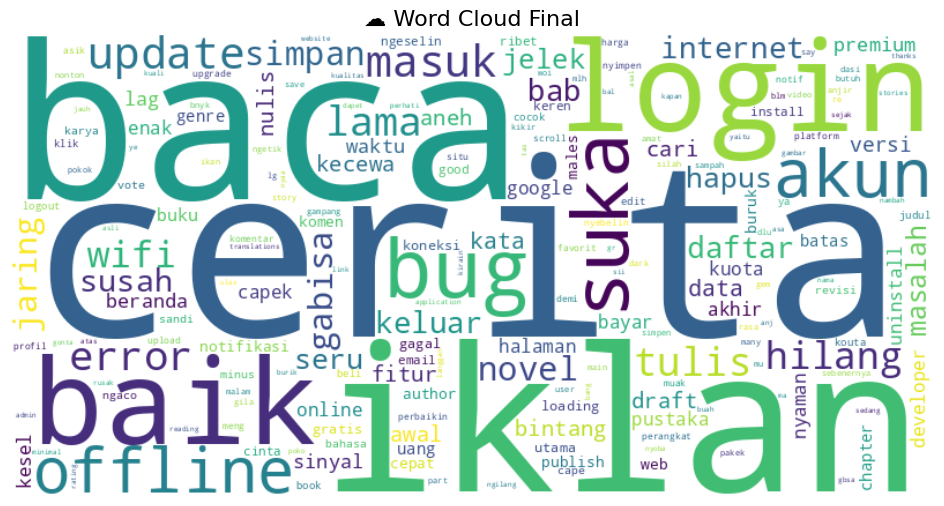

In [ ]:
all_words = [word for tokens in df_reviews['content_filtered'] for word in tokens]
text = ' '.join(all_words)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    collocations=False
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Word Cloud Final", fontsize=16)
plt.show()
